<a href="https://colab.research.google.com/github/hiranshree/AIML/blob/main/20211CCS0153_LABSHEET_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# Load the Dataset into a frame


In [ ]:
df = pd.read_csv("/content/heart (1).csv")

# Print the description, dimensions and first few records

In [ ]:
print(df.info())
print(df.shape)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0      

# Check whether the data has any missing value in any column

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Check whether the data has balanced class distribution. Class target = 0 indicates "Heart Disease" and target = 1 indicates "No Heart Disease"

<Axes: ylabel='count'>

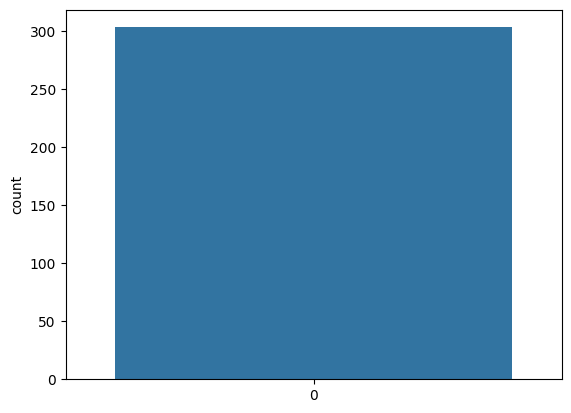

In [ ]:
sns.countplot(df['target'])

# Check input feature X, target Y, classifier object, train-test-split using 80-20% split

In [ ]:
x = df.drop(columns=['target'])
y = df['target']
knn = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Train model

In [ ]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Validate model on test set

In [ ]:
y_pred = knn.predict(x_test)

# Print Classification Report on test data

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



# Print AUC score on test data

In [ ]:
roc_auc_score(y_test, y_pred)

0.6853448275862069

# The performance of the model is very poor. Hence hyperparameters of KNN to be turned using GridSearchCV

# Hyperparameter turing using GridSearchCV. Set the parameter a) leaf-size=1-15, b)n_neighbours=1-10 and c) distance metric, p=1,2. Where p=1 it's Manhattan and p=2 it's Euclidian distance. GridSearchCV uses CV to search for the optimal values of the hyperparameters. It's accepts the parameters as a dictionary.  

In [ ]:
leaf_size = list(range(1,15))
n_neighbors = list(range(1,10))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors,p=p)

# Train a new KNN model using GridSearchCV

In [ ]:
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10, scoring = 'roc_auc')
best_model = clf.fit(x,y)

# Print the best values of the hyperparameters.

In [ ]:
#Nilai hyperparameter terbaik
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best score:',best_model.best_score_)

Best leaf_size: 9
Best p: 1
Best n_neighbors: 7
Best score: 0.7483536683904332


# Validate the model on test data

In [ ]:
y_pred = best_model.predict(x_test)

# Print classification report and AUC score of the model on test data

In [ ]:
print(classification_report(y_test, y_pred))
print("The AUC Score is:",roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

The AUC Score is: 0.8060344827586207
